In [1]:
import pandas as pd
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn import svm

from sklearn import metrics 
from sklearn.metrics import classification_report

from tensorflow.keras import layers, models
from sklearn.model_selection import KFold

In D:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In D:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.jpeg_quality rcparam was deprecated in M

In [2]:
DATADIR = "data"

# All the categories you want your neural network to detect
CATEGORIES = ["Rotating", "Not_Rotating"]
dataset = []
img_size = (256, 256)
for category in CATEGORIES :
		path = os.path.join(DATADIR, category)
		class_num = CATEGORIES.index(category)
		for img in os.listdir(path):
			try :
				img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
				new_array = cv2.resize(img_array, img_size)
				dataset.append([new_array, class_num])
			except Exception as e:
				pass
            

X = [] #features
Y = [] #labels

for features, label in dataset:
	X.append(features)
	Y.append(label)

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state = 1)

X_train = np.array(X_train).reshape(-1, img_size[0], img_size[1], 3)
Y_train = np.array(Y_train).reshape(-1,)
X_train = ( X_train)/255

X_test = np.array(X_test).reshape(-1,  img_size[0], img_size[1], 3)
Y_test = np.array(Y_test).reshape(-1,)
X_test = (X_test)/255

In [4]:
conv_filter = (3,3)
pool = (2,2)

model = models.Sequential()
model.add(layers.Conv2D(10, conv_filter, padding='same', activation='relu', input_shape=( img_size[0], img_size[1], 3)))
model.add(layers.AveragePooling2D(pool_size = pool, strides=None))
model.add(layers.Conv2D(20, conv_filter, padding='same', activation='relu'))
model.add(layers.AveragePooling2D(pool_size = pool, strides=None))
model.add(layers.Conv2D(30, conv_filter, padding='same', activation='relu'))
model.add(layers.AveragePooling2D(pool_size = pool, strides=None))
model.add(layers.Conv2D(40, conv_filter, padding='same', activation='relu'))
model.add(layers.AveragePooling2D(pool_size = pool, strides=None))
model.add(layers.Conv2D(60, conv_filter, padding='same', activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.AveragePooling2D(pool_size = pool, strides=None))
model.add(layers.Conv2D(80, conv_filter, padding='same', activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(2, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 10)      280       
_________________________________________________________________
average_pooling2d (AveragePo (None, 128, 128, 10)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 20)      1820      
_________________________________________________________________
average_pooling2d_1 (Average (None, 64, 64, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 30)        5430      
_________________________________________________________________
average_pooling2d_2 (Average (None, 32, 32, 30)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 40)        1

In [5]:
model.compile(loss = tf.keras.losses.sparse_categorical_crossentropy, 
   optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])


history = model.fit(X_train, Y_train, epochs=300, shuffle = True, batch_size = 32,
                    validation_data = (X_test, Y_test), use_multiprocessing = True)

Train on 300 samples, validate on 100 samples
Epoch 1/300
300/300 [==============================] - 9s 30ms/sample - loss: 0.6940 - accuracy: 0.5633 - val_loss: 0.6948 - val_accuracy: 0.4600
Epoch 2/300
300/300 [==============================] - 6s 21ms/sample - loss: 0.6585 - accuracy: 0.6333 - val_loss: 0.6792 - val_accuracy: 0.5700
Epoch 3/300
300/300 [==============================] - 6s 20ms/sample - loss: 0.6328 - accuracy: 0.6433 - val_loss: 0.6944 - val_accuracy: 0.5800
Epoch 4/300
300/300 [==============================] - 6s 20ms/sample - loss: 0.6223 - accuracy: 0.6500 - val_loss: 0.6727 - val_accuracy: 0.5800
Epoch 5/300
300/300 [==============================] - 6s 19ms/sample - loss: 0.6203 - accuracy: 0.6300 - val_loss: 0.6903 - val_accuracy: 0.5800
Epoch 6/300
300/300 [==============================] - 6s 19ms/sample - loss: 0.6109 - accuracy: 0.6667 - val_loss: 0.6863 - val_accuracy: 0.5800
Epoch 7/300
300/300 [==============================] - 6s 19ms/sample - loss: 

Epoch 112/300
300/300 [==============================] - 6s 20ms/sample - loss: 0.1029 - accuracy: 0.9667 - val_loss: 0.2453 - val_accuracy: 0.9400
Epoch 113/300
300/300 [==============================] - 6s 20ms/sample - loss: 0.0873 - accuracy: 0.9567 - val_loss: 0.1984 - val_accuracy: 0.9100
Epoch 114/300
300/300 [==============================] - 6s 20ms/sample - loss: 0.0508 - accuracy: 0.9933 - val_loss: 0.1846 - val_accuracy: 0.9200
Epoch 115/300
300/300 [==============================] - 6s 21ms/sample - loss: 0.0801 - accuracy: 0.9700 - val_loss: 0.2346 - val_accuracy: 0.9200
Epoch 116/300
300/300 [==============================] - 6s 22ms/sample - loss: 0.0614 - accuracy: 0.9800 - val_loss: 0.2255 - val_accuracy: 0.9200
Epoch 117/300
300/300 [==============================] - 6s 20ms/sample - loss: 0.0674 - accuracy: 0.9833 - val_loss: 0.2283 - val_accuracy: 0.9300
Epoch 118/300
300/300 [==============================] - 6s 20ms/sample - loss: 0.1086 - accuracy: 0.9600 - val_

300/300 [==============================] - 6s 20ms/sample - loss: 0.0287 - accuracy: 0.9900 - val_loss: 0.3055 - val_accuracy: 0.9200
Epoch 223/300
300/300 [==============================] - 6s 21ms/sample - loss: 0.0251 - accuracy: 0.9933 - val_loss: 0.2514 - val_accuracy: 0.9100
Epoch 224/300
300/300 [==============================] - 6s 21ms/sample - loss: 0.0340 - accuracy: 0.9900 - val_loss: 0.2479 - val_accuracy: 0.9100
Epoch 225/300
300/300 [==============================] - 7s 23ms/sample - loss: 0.0169 - accuracy: 0.9967 - val_loss: 0.2531 - val_accuracy: 0.9200
Epoch 226/300
300/300 [==============================] - 6s 20ms/sample - loss: 0.0130 - accuracy: 0.9967 - val_loss: 0.2644 - val_accuracy: 0.9300
Epoch 227/300
300/300 [==============================] - 6s 21ms/sample - loss: 0.0134 - accuracy: 0.9967 - val_loss: 0.2695 - val_accuracy: 0.9300
Epoch 228/300
300/300 [==============================] - 6s 20ms/sample - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.2693 -

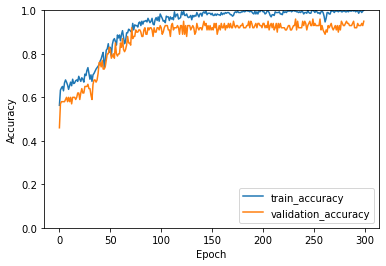

In [10]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

100/100 - 1s - loss: 0.2847 - accuracy: 0.9500
test accuracy = 95.0 %

              precision    recall  f1-score   support

           0       0.98      0.91      0.94        45
           1       0.93      0.98      0.96        55

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



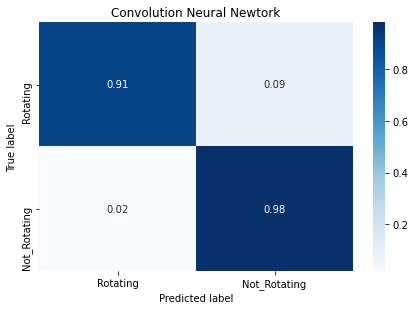

In [7]:

test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)
Y_te = np.array(tf.math.argmax(model.predict(X_test), 1))
cm = tf.math.confusion_matrix(Y_test, Y_te)


acc = metrics.accuracy_score(Y_test, Y_te)
print("test accuracy =", acc*100,"%\n")

print(classification_report(Y_test, Y_te))

con_mat = tf.math.confusion_matrix(labels=Y_test, predictions=Y_te).numpy()

con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
classes = ["Rotating", "Not_Rotating"]
con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)
figure = plt.figure()
sns.heatmap(con_mat_df, annot=True, cmap="Blues")
plt.tight_layout()
plt.title('Convolution Neural Newtork')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

